<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project4 - Clustering</h3>
</div>

<img src = "https://miro.medium.com/max/5760/1*_SRbz8535-CxPzo6IL9pBA.png" width=80%>

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Load and Prepare Data

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

## Data Preprocessing

In [7]:
data_train = data.drop(columns=['CustomerID'])

## Strorytelling - Visualization

c:\Users\Sepehr\general_python_venvs\mldl-venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


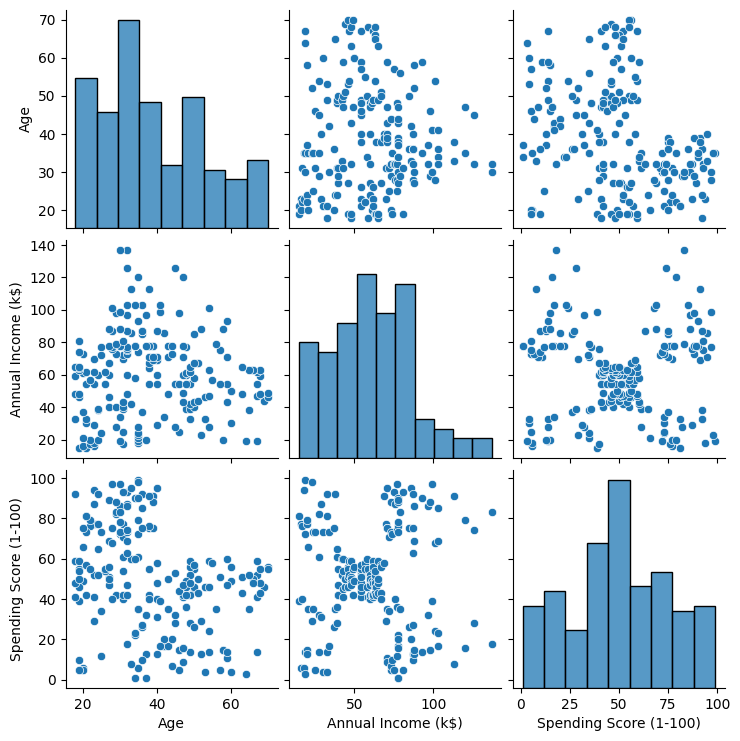

In [8]:
sns.pairplot(data=data_train)

c:\Users\Sepehr\general_python_venvs\mldl-venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


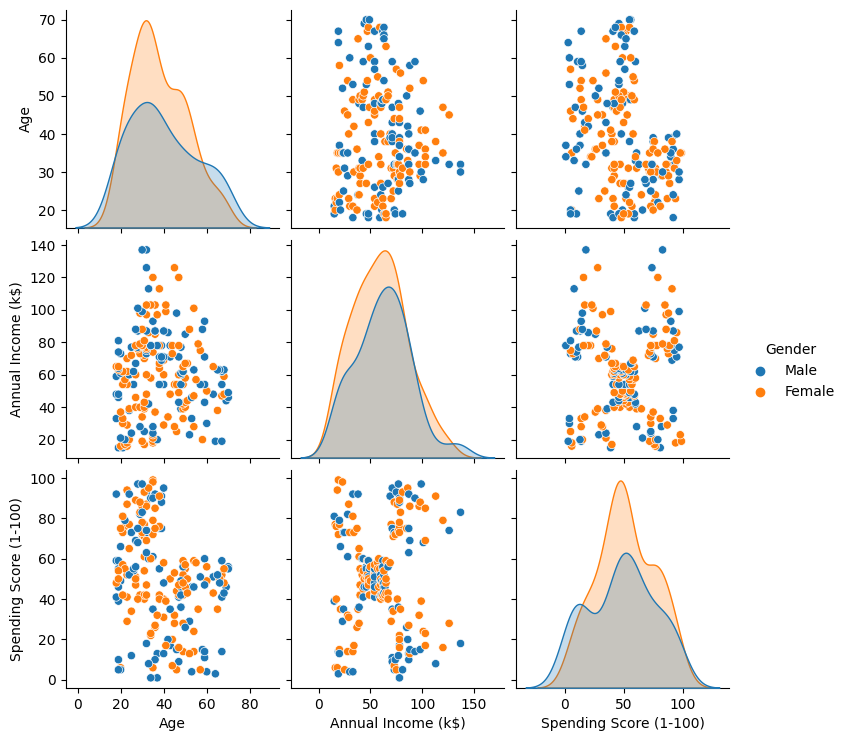

In [9]:
sns.pairplot(data=data_train, hue='Gender')

## Train the Model (Clustering)

In [10]:
from sklearn.preprocessing import LabelEncoder

gender_enc = LabelEncoder()

data_train['Gender'] = gender_enc.fit_transform(data_train['Gender'])
data_train.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [11]:
from sklearn.preprocessing import StandardScaler

X = data_train.values

sc = StandardScaler()

X = sc.fit_transform(X)

In [40]:
from sklearn.cluster import KMeans, DBSCAN

clusterer = KMeans(n_clusters=5)

y = clusterer.fit_predict(X)

c:\Users\Sepehr\general_python_venvs\mldl-venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [41]:
result = data.merge(pd.DataFrame({'CustomerID':data['CustomerID'], 'Cluster':y})).drop(columns=['CustomerID'])
result

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,4
3,Female,23,16,77,0
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,3
197,Male,32,126,74,1
198,Male,32,137,18,3


In [42]:
result['Cluster'].value_counts()

Cluster
0    56
4    42
1    40
2    35
3    27
Name: count, dtype: int64

c:\Users\Sepehr\general_python_venvs\mldl-venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


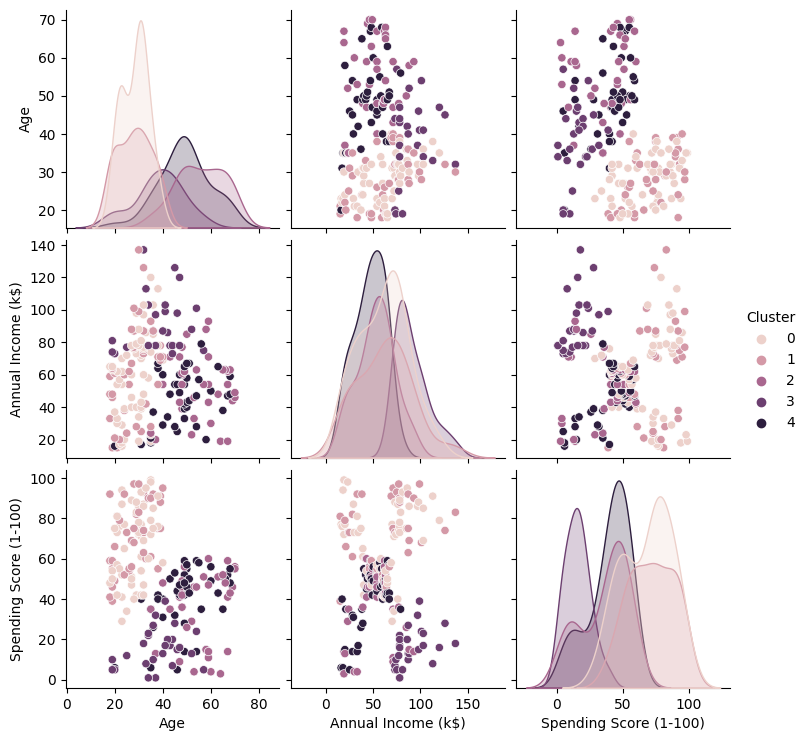

In [43]:
sns.pairplot(result, hue='Cluster')

In [44]:
import joblib

joblib.dump(clusterer, 'kmeans-clustering.joblib')

['kmeans-clustering.joblib']

In [61]:
clusterer = DBSCAN(eps=0.75)

y = clusterer.fit_predict(X)

In [62]:
result = data.merge(pd.DataFrame({'CustomerID':data['CustomerID'], 'Cluster':y})).drop(columns=['CustomerID'])
result

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,-1
1,Male,21,15,81,1
2,Female,20,16,6,-1
3,Female,23,16,77,0
4,Female,31,17,40,-1
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,-1
197,Male,32,126,74,-1
198,Male,32,137,18,-1


In [63]:
result['Cluster'].value_counts()

Cluster
 0    92
-1    26
 2    25
 4    16
 6    12
 3    11
 5    10
 1     8
Name: count, dtype: int64

c:\Users\Sepehr\general_python_venvs\mldl-venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


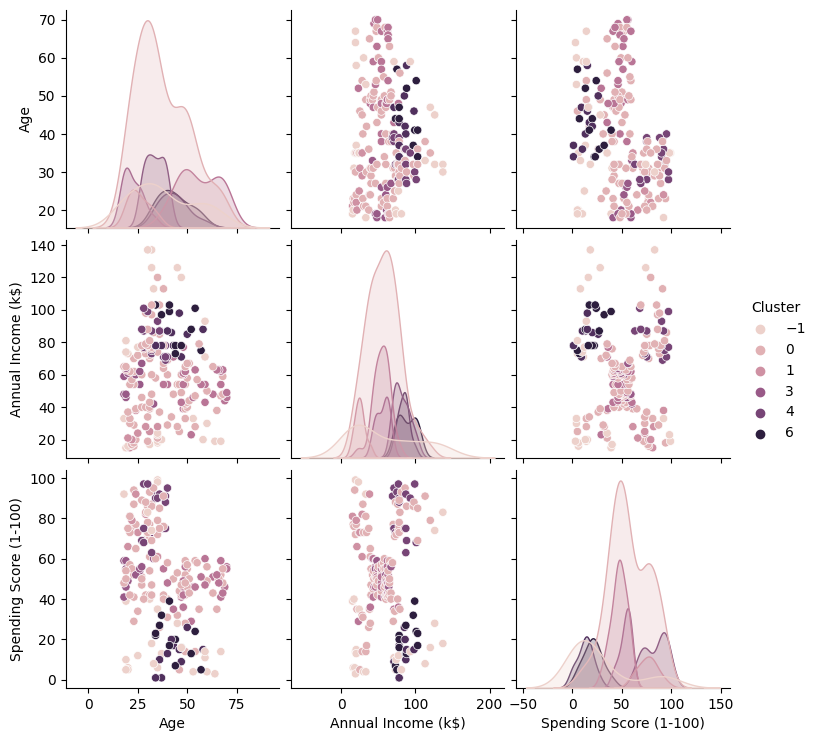

In [64]:
sns.pairplot(result, hue='Cluster')

c:\Users\Sepehr\general_python_venvs\mldl-venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


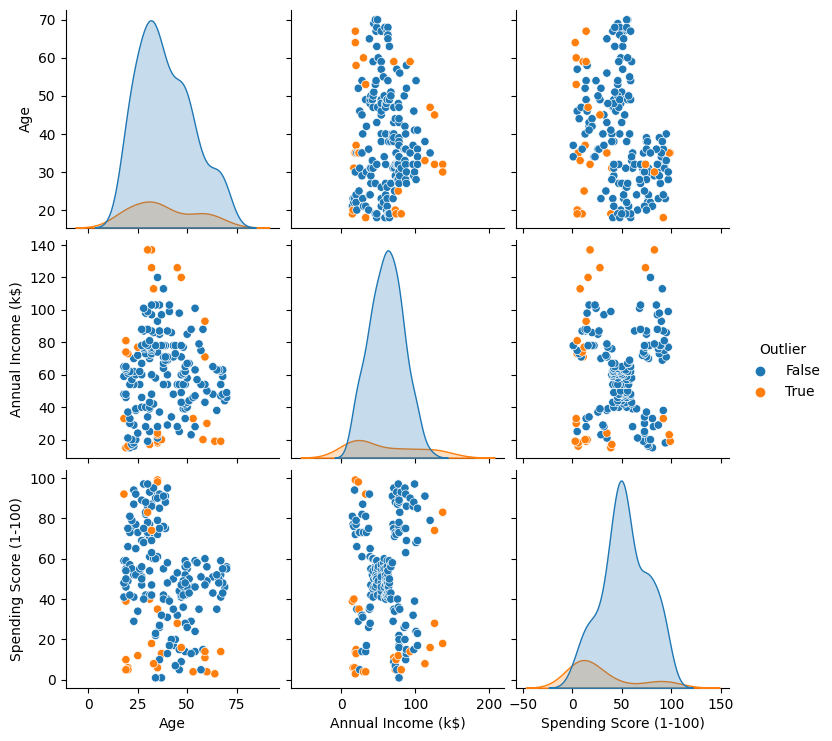

In [65]:
temp_data = result.copy()
temp_data['Outlier'] = temp_data['Cluster'] == -1
sns.pairplot(temp_data.drop(columns='Cluster'), hue='Outlier')

In [66]:
joblib.dump(clusterer, 'dbscan-clustering.joblib')

['dbscan-clustering.joblib']

## Send us the Result (Maktabkhoone)